In [30]:

import os
os.chdir("/Users/ariedamuco/Dropbox (CEU Econ)/TextAnalysisCEU")
import pandas as pd # data processing

amazon=pd.read_csv('Input/Amazon_Unlocked_Mobile.csv')
#amazon=pd.read_csv('Input/Amazon_Unlocked_Mobile.csv',  nrows=1000)

amazon.head()
amazon_short=amazon[0:1000]

In [31]:

review=amazon[['Reviews']][0:1000]
review=review.dropna()
#import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [41]:
print(sentiment.polarity_scores("The phone is super cool."))
print(sentiment.polarity_scores("The phone is super cool!"))
print(sentiment.polarity_scores("The phone is super cool!!"))
print(sentiment.polarity_scores("The phone is super cool!!!"))
print(sentiment.polarity_scores("The phone is super COOL!!!"))
print(sentiment.polarity_scores("The phone is super COOL!!! :-)"))

{'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}
{'neg': 0.0, 'neu': 0.316, 'pos': 0.684, 'compound': 0.7574}
{'neg': 0.0, 'neu': 0.307, 'pos': 0.693, 'compound': 0.7772}
{'neg': 0.0, 'neu': 0.298, 'pos': 0.702, 'compound': 0.795}
{'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'compound': 0.832}
{'neg': 0.0, 'neu': 0.229, 'pos': 0.771, 'compound': 0.8781}


In [33]:
#rev['polarity']=rev['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x)))

review['polarity_score']=review['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
review['neutral'] = review['Reviews'].apply(lambda x:sentiment.polarity_scores(str(x))['neu'])
review['negative'] = review['Reviews'].apply(lambda x:sentiment.polarity_scores(str(x))['neg'])
review['positive'] = review['Reviews'].apply(lambda x:sentiment.polarity_scores(str(x))['pos'])


In [34]:

review['sentiment']=''
review.head()

review.loc[review.polarity_score>0,'sentiment']='Positive'
review.loc[review.polarity_score==0,'sentiment']='Neutral'
review.loc[review.polarity_score<0,'sentiment']='Negative'
review.head()

,Reviews,polarity_score,neutral,negative,positive,sentiment
0,I feel so LUCKY to have found this used (phone...,0.8783,0.796,0.015,0.189,Positive
1,"nice phone, nice up grade from my pantach revu...",0.9231,0.597,0.072,0.331,Positive
2,Very pleased,0.4927,0.238,0.000,0.762,Positive
3,It works good but it goes slow sometimes but i...,0.9185,0.500,0.000,0.500,Positive
4,Great phone to replace my lost phone. The only...,0.2942,0.897,0.038,0.065,Positive


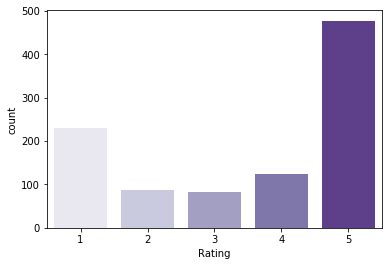

In [35]:
import matplotlib.pyplot as plt


amazon_short[['polarity_score', 'sentiment']]=review[['polarity_score', 'sentiment']]

import seaborn as sns
sns.countplot(x='Rating', data=amazon_short, palette="Purples")


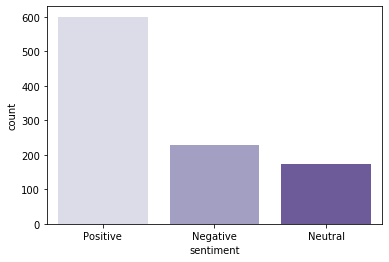

In [36]:
sns.countplot(x='sentiment', data=amazon_short, palette="Purples")


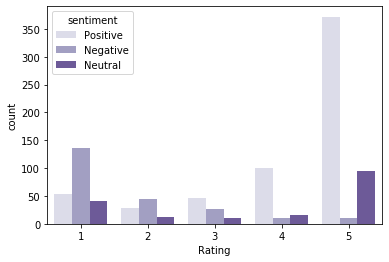

In [37]:
sns.countplot(x='Rating', hue="sentiment", data=amazon_short, palette="Purples")